<a href="https://colab.research.google.com/github/TrimoA/Dataset-Analisis-Data/blob/main/Trimo_Agus_S_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# Proyek Analisis Data: Bike Sharing
- **Nama:** Trimo Agus Safitriyono
- **Email:** a548ybf485@devacademy.id
- **ID Dicoding:** trimoaguss

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda per jam?
- Bagaimana perbandingan jumlah penyewaan sepeda antara hari biasa dan hari libur?
- Bagaimana perbandingan jumlah penyewaan sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Memuat Dataset Bike Sharing
url1 = 'https://raw.githubusercontent.com/TrimoA/Dataset-Analisis-Data/refs/heads/main/day.csv'
url2 = 'https://raw.githubusercontent.com/TrimoA/Dataset-Analisis-Data/refs/heads/main/hour.csv'
day_df = pd.read_csv(url1)
hour_df = pd.read_csv(url2)
day_df.head()
hour_df.head()

**Insight:**
- Beradasarkan data day.csv pada dataset bike sharing yang digunakan terdiri dari beberapa kolom data, yaitu: date, season, year, month, holiday, weekday, workingday, weather, temp, humidity, windspeed, dan jumlah penyewaan sepeda. sedangkan pada data hour.csv terdiri dari date, season, year, month, hour, holiday, weekday, workingday, weather, temp, humidity, dan jumlah penyewaan sepeda. Dari data set tersebut maka untuk menjawab pertanyaan 1  tren penyewaan per jam akan menggunakan data frame hour_df. Selanjutnya, data frame day_df akan digunakan untuk menjawab pertanyaan 2 terkait perbandingan jumlah penyewaan pada hari biasa dan hari libur. Selain itu, day_df juga akan digunakan untuk menjawab pertanyaan 3 terkait perbandingan jumlah penyewa berdasarkan musim/season.


### Assessing Data

In [ ]:
#Menilai Data hour_df
hour_df.info()
##Mencari missing data
hour_df.isna().sum()
##mencari duplikasi data
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

#Menilai Data day_df
day_df.info()
##Mencari missing data
day_df.isna().sum()
##Mencari duplikasi data
print('Jumlah duplikasi: ', day_df.duplicated().sum())

**Insight:**
- Berdasarkan hasil assesing data hour_df menunjukkan bahwa data frame hour_df memiliki jumlah baris data sebanyak 17379 dengan 17 kolom yang terdiri dari 4 tipe data float, 12 tipe data int, dan 1 tipe data object. Selain itu, data frame ini tidak terdapat data yang missing value dan terduplikasi.
- Berdasarkan hasil assesing data day_df menunjukkan bahwa data frame day_df memiliki jumlah baris data sebanyak 731 dengan 16 kolom yang terdiri dari 4 tipe data float, 11 tipe data int, dan 1 tipe data object. Selain itu, data frame ini tidak terdapat data yang missing value dan terduplikasi.

### Cleaning Data

In [ ]:
#Menghilangkan duplikasi dan missing value data frame hour_df
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.dropna(axis=0, inplace=True)
##Cek data yang telah di-cleaning
hour_df.describe()
hour_df.info()
#Menghilangkan duplikasi dan missing value data frame day_df
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.dropna(axis=0, inplace=True)
##Cek data yang telah di-cleaning
day_df.describe()
day_df.info()

**Insight:**
- Berdasarkan analisis pada tahap cleaning data menunjukkan bahwa kedua data frame tidak memiliki duplikasi maupun missing value. Selain itu, pada kedua data frame tersebut tidak dijumpai data yang memiliki inaccurate value. Oleh karena itu, data dapat dikatakan telah bersih dan sesuai dengan kebutuhan untuk menganalisis 3 pertanyaan bisnis yang telah dipaparkan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Eksplorasi Data Frame hour_df
hour_df.describe(include= 'all')
hour_df.groupby(by='hr').agg({
    'cnt': ['mean','max', 'min', 'std'],
    'weekday': ['mean','max', 'min', 'std'],
    'workingday':['mean','max', 'min', 'std'],
    'holiday': ['mean','max', 'min', 'std'],
    'season': ['mean','max', 'min', 'std']
})
##Mengurutkan rerata penyewaan terbanyak berdasarkan jam
hour_df.groupby(by='hr').cnt.mean().sort_values(ascending=False)
##Mengurutkan rerata penyewaan terbanyak berdasarkan weekday
hour_df.groupby(by='weekday').cnt.mean().sort_values(ascending=False)
##Mengurutkan rerata penyewaan terbanyak berdasarkan workingday
hour_df.groupby(by='workingday').cnt.mean().sort_values(ascending=False)
##Mengurutkan rerata penyewaan terbanyak berdasarkan holiday
hour_df.groupby(by='holiday').cnt.mean().sort_values(ascending=False)

#Eksplorasi Data Frame day_df
day_df.describe(include= 'all')
day_df.groupby(by='season').agg({
    'cnt': ['mean','max', 'min', 'std'],
    'weekday': ['mean','max', 'min', 'std'],
    'workingday':['mean','max', 'min', 'std'],
    'holiday': ['mean','max', 'min', 'std'],
    'season': ['mean','max', 'min', 'std']
})
##Mengurutkan rerata penyewaan terbanyak berdasarkan jam
day_df.groupby(by='season').cnt.mean().sort_values(ascending=False)
##Rerata penyewaan berdasarkan season dan weekday
day_df.groupby(['season', 'weekday'])['cnt'].mean()
##Mengeksplor rerata penyewaan berdasarkan season dan working day
day_df.groupby(['season', 'workingday'])['cnt'].mean()
##Mengeksplor rerata penyewaan berdasarkan season, working day, dan humidity
day_df.groupby(['season', 'workingday', 'hum'])['cnt'].mean()

**Insight:**
Berdasarkan explorasi data menunjukkan bahwa:
- Puncak penyewaan terjadi pada jam 17:00 (5 sore) dan 8:00 (8 pagi). Jam sibuk tersebut menunjukkan adanya pola commuting (perjalanan kerja/pulang kerja). Di sisi lain, rendahnya jumlah penyewaan terjadi pada dini hari (00:00 - 5:00).
- Hari kerja memiliki jumlah penyewaan lebih tinggi dibandingkan akhir pekan. Hal ini menunjukkan bahwa banyak pengguna yang menggunakan sepeda untuk keperluan kerja atau sekolah. Sedangkan pada hari libur, pola penyewaan lebih merata sepanjang hari dan cenderung memiliki lebih sedikit penyewaan dibandingkan hari biasa. Hal ini dimungkinkan karena tidak ada lonjakan tajam seperti pada hari kerja (karena tidak ada jam commuting).
- Musim gugur (season = 3) memiliki rata-rata penyewaan tertinggi dibandingkan musim lainnya.
Hal ini mungkin disebabkan oleh kondisi cuaca yang nyaman untuk bersepeda. Selain itu, mungkin juga ada faktor lain seperti kebiasaan pengguna atau adanya acara tertentu yang meningkatkan penggunaan sepeda.
- Kelembaban (hum) mempengaruhi jumlah penyewaan.Saat kelembaban tinggi, jumlah penyewaan cenderung lebih rendah.
Ini menunjukkan bahwa kondisi cuaca mempengaruhi keputusan pengguna untuk menyewa sepeda. Sebaliknya, kecepatan angin (windspeed) tidak terlalu berpengaruh terhadap penyewaan sepeda. Berbeda dengan kelembaban, kecepatan angin tidak menunjukkan tren yang signifikan dalam mempengaruhi jumlah penyewaan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

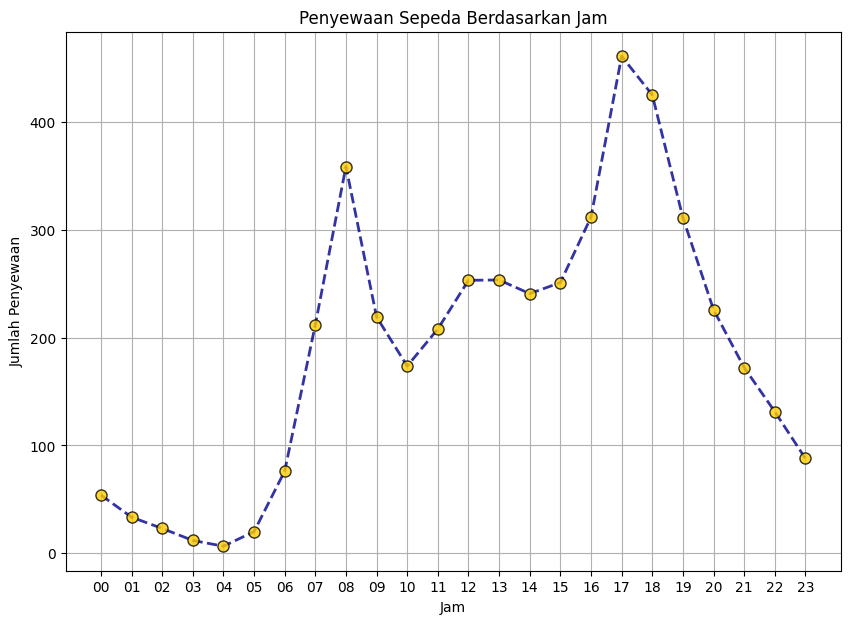

In [13]:
#Analisis tren penyewaan sepeda per jam menggunakan plot dan garis
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10,7))
hourly_rentals.index = hourly_rentals.index.astype(str).str.zfill(2)
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', markersize=8,
         markerfacecolor='#FFCC00', markeredgecolor='#000000', linestyle='--',
         linewidth=2, color='#00008B', alpha=0.8, label='Hourly Rentals')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.grid()
plt.show()

**Insight:**
Berdasarkan analisis data menunjukan bahwa:
- Terdapat dua puncak utama penyewaan sepeda: Pukul 08:00 (pagi), Kemungkinan besar karena orang berangkat kerja atau sekolah.
Pada pukul 17:00 (sore), Menunjukkan waktu pulang kerja/sekolah. Tren penyewaan tersebut mengindikasikan bahwa sepeda banyak digunakan untuk keperluan commuting (bekerja/sekolah).
- Penyewaan sepeda sangat rendah antara pukul 00:00 - 05:00. Hal tersebut kemungkinan disebebkan oleh: (1) Kurangnya mobilitas masyarakat di jam-jam tersebut. (2) Faktor keamanan dan minimnya penerangan di malam hari.
Dengan idikasi tersebut maka operator dapat mengurangi jumlah sepeda yang tersedia pada jam ini untuk menghemat biaya operasional.
- Tren penggunaan sepeda menunjukkan pola harian yang konsisten. Lonjakan pagi dan sore hari terjadi secara berulang setiap harinya, mengindikasikan bahwa pengguna sepeda cenderung memiliki kebiasaan yang tetap. Dengan begitu, terdapat strategi yang dapat diterapkan oleh penyedia jasa, seperti:(1)menyediakan program berlangganan untuk pekerja atau pelajar. (2) memastikan ketersediaan sepeda pada jam-jam puncak.
- Perbedaan pola antara hari kerja dan akhir pekan. Pada hari kerja, pola dua puncak (pagi dan sore) lebih jelas. Pada akhir pekan, penyewaan cenderung lebih merata sepanjang hari.

### Pertanyaan 2:

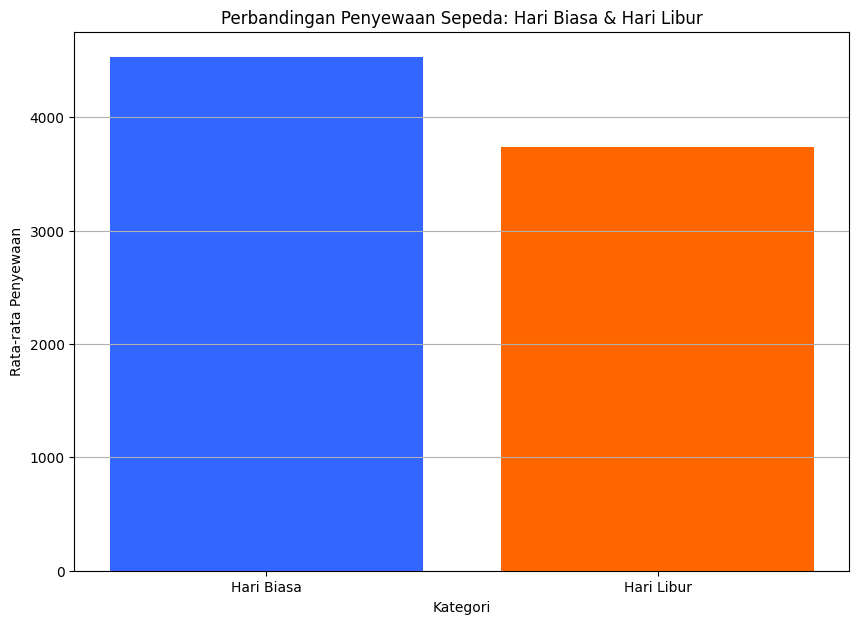

In [12]:
#Analisis hari biasa dan hari libur dengan diagram batang
holiday_rentals = day_df.groupby('holiday')['cnt'].mean()
holiday_labels = {0: 'Hari Biasa', 1: 'Hari Libur'}
plt.figure(figsize=(10,7))
colors =['#3366FF', '#FF6600']
plt.bar(holiday_rentals.index, holiday_rentals.values, tick_label=[holiday_labels[h] for h in holiday_rentals.index],
        color=colors)
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda: Hari Biasa & Hari Libur')
plt.grid(axis='y')
plt.show()

**Insight:**
Berdasarkan analisis data menunjukkan bahwa:
- Penyewaan sepeda lebih tinggi pada hari biasa dibandingkan hari libur. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama, bukan sekadar untuk rekreasi. Hal tersebut dapat dimungkinkan karena banyak orang menggunakan sepeda untuk pergi bekerja atau sekolah saat hari biasa.
- Penyewaan menurun saat hari libur. hal tersbut dapat jadi karena orang lebih memilih menggunakan moda transportasi lain (misalnya kendaraan pribadi atau angkutan umum) untuk perjalanan rekreasi. Alternatif lain, beberapa pengguna tetap berada di rumah saat libur sehingga mengurangi permintaan penyewaan sepeda.
- Dari analisis tersebut strategi bisnis yang dapat diterapkan: (1) Optimalisasi sepeda di hari kerja: Pastikan jumlah sepeda cukup pada jam sibuk (pagi & sore) untuk mendukung kebutuhan transportasi pekerja/pelajar. (2)Promosi atau diskon khusus di hari libur: Dapat dibuat promo seperti "sewa 1 jam gratis 30 menit tambahan" agar menarik lebih banyak pengguna di hari libur.


###Pertanyaan 3

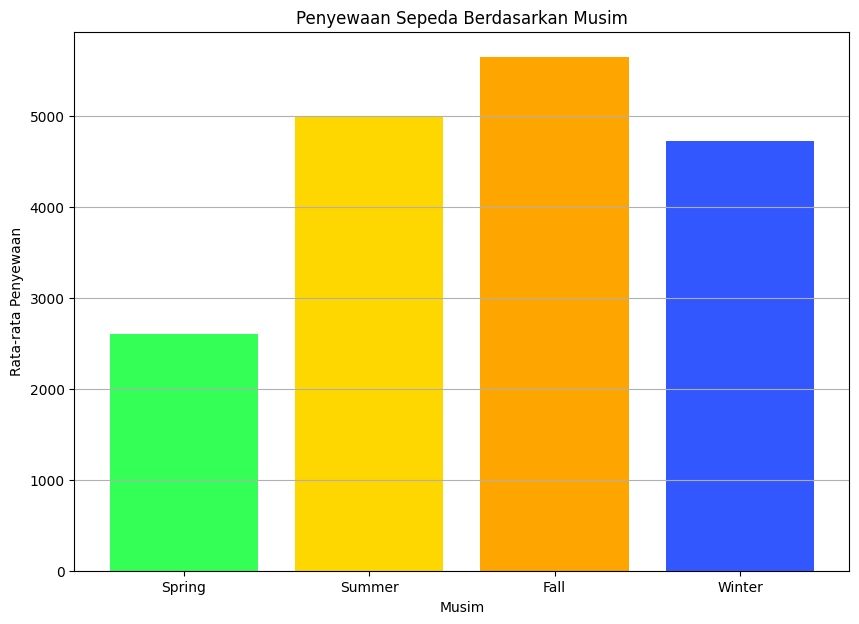

In [11]:
#Analisis penyewaan berdasarkan musim dengan diagram batang
seasonal_rentals = day_df.groupby('season')['cnt'].mean()
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
colors = ['#33FF57', '#FFD700', '#FFA500', '#3357FF']
plt.figure(figsize=(10,7))
plt.bar(seasonal_rentals.index, seasonal_rentals.values, tick_label=[season_labels[s] for s in seasonal_rentals.index],color=colors)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.grid(axis='y')
plt.show()

**insight:**
Berdasarkan analisis data menunjukkan bahwa:
- Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall). Hal ini mungkin disebabkan oleh kondisi cuaca yang nyaman untuk bersepeda.
Bisa juga ada faktor lain seperti kebiasaan pengguna atau adanya acara tertentu yang meningkatkan penggunaan sepeda.
- Musim panas (Summer) juga memiliki jumlah penyewaan yang tinggi, hanya sedikit di bawah musim gugur. Kemungkinan karena cuaca yang mendukung aktivitas luar ruangan. Liburan musim panas juga bisa menjadi faktor meningkatnya penggunaan sepeda.
- Musim dingin (Winter) memiliki jumlah penyewaan yang masih cukup tinggi, lebih banyak dibandingkan musim semi (Spring). Ini cukup menarik karena biasanya aktivitas luar ruangan menurun saat musim dingin. Mungkin ada infrastruktur yang mendukung penggunaan sepeda meskipun cuaca lebih dingin.
- Musim semi (Spring) memiliki jumlah penyewaan terendah dibandingkan musim lainnya.Bisa jadi karena cuaca yang masih cenderung tidak stabil (hujan dan suhu dingin). Pengguna mungkin masih beradaptasi setelah musim dingin, sehingga belum terlalu banyak yang kembali bersepeda.

## Conclusion

- **Conclution pertanyaan 1:**
Berdasarkan analisis data menunjukan bahwa Tren penyewaan sepeda per jam menunjukkan pola yang jelas dengan dua puncak utama, yaitu pada pagi hari sekitar pukul 07:00-08:00 dan sore hari sekitar pukul 17:00-18:00. Pola ini mengindikasikan bahwa banyak pengguna sepeda yang menggunakannya sebagai sarana transportasi untuk pergi dan pulang kerja atau sekolah. Sementara itu, pada malam hari dan dini hari, jumlah penyewaan sepeda jauh lebih rendah, yang kemungkinan disebabkan oleh keterbatasan aktivitas di jam-jam tersebut.
- **Conclution pertanyaan 2:**
Berdasarkan analisis data menunjukan bahwa perbandingan jumlah penyewaan sepeda antara hari biasa dan hari libur menunjukkan bahwa penyewaan lebih tinggi pada hari biasa dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan mobilitas harian, seperti perjalanan ke kantor atau sekolah, dibandingkan untuk rekreasi di akhir pekan. Meskipun ada penggunaan sepeda pada hari libur, jumlahnya tetap lebih rendah dibandingkan hari biasa yang dapat disebabkan oleh perubahan pola aktivitas masyarakat.
- **Conclution pertanyaan 2:**
Berdasarkan analisis data menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin, sedangkan musim semi memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa cuaca yang lebih nyaman di musim gugur dan musim panas mendukung lebih banyak aktivitas bersepeda dibandingkan musim lainnya. Sementara itu, musim semi dengan cuaca yang lebih bervariasi atau tidak stabil kemungkinan menjadi faktor menurunnya jumlah penyewaan sepeda.